In [1]:
import pandas as pd
import numpy as np

In [2]:
Cleaned_hm = pd.read_csv("/Users/jim/Desktop/HappyDB-master/happydb/data/cleaned_hm.csv",index_col = 'wid')

In [3]:
Workers = pd.read_csv("/Users/jim/Desktop/HappyDB-master/happydb/data/demographic.csv",index_col = 'wid')

In [4]:
orginal = pd.read_csv("/Users/jim/Desktop/HappyDB-master/happydb/data/original_hm.csv")

In [6]:
cleaned_hm_version2 = pd.read_csv("/Users/jim/Desktop/HappyDB-master/processed_moments.csv",index_col = 'wid')

In [7]:
senselabel = pd.read_csv("/Users/jim/Desktop/HappyDB-master/happydb/data/senselabel.csv")

In [8]:
vad = pd.read_csv("/Users/jim/Desktop/HappyDB-master/happydb/data/vad.csv")

In [9]:
cleaned_hm_version2.head()

,hmid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,id,text
wid,,,,,,,,,,
2053,27673,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,1,successfully date sympathy connected
2,27674,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,2,son marks examination
1936,27675,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise,3,gym morning yoga
206,27676,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding,4,talked friend flaky understood evening hang
6227,27677,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection,5,grandchildren butterfly display crohn conserva...


In [10]:
result2 = pd.concat([cleaned_hm_version2, Workers], axis=1, join='inner')

In [11]:
result1 = pd.concat([Cleaned_hm, Workers], axis=1, join='inner')

In [12]:
result2.head()

,hmid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,id,text,age,country,gender,marital,parenthood
wid,,,,,,,,,,,,,,,
2053,27673,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,1,successfully date sympathy connected,35,USA,m,single,n
2,27674,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,2,son marks examination,29.0,IND,m,married,y
1936,27675,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise,3,gym morning yoga,30,USA,f,married,y
206,27676,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding,4,talked friend flaky understood evening hang,28,DNK,f,married,n
6227,27677,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection,5,grandchildren butterfly display crohn conserva...,55,USA,f,divorced,y


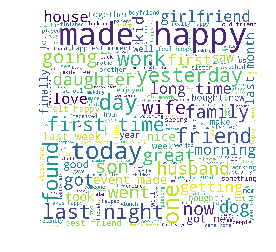

In [15]:
#WordCloud
sentence_list = []
for i in Cleaned_hm['cleaned_hm']:
    sentence_list.append(i)
text=''
for x in sentence_list:
    text+=x

from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)#<-must be the string
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
   

In [243]:
#len(k.split())#292599
k = ''
for i in result2[result2['gender']=='m']['text']:
    k+=str(i)
male_words_repetition = k.split()
male_words = set(k.split()) #57317
dict_male = {}
for i in male_words:
    dict_male[i] =0
for k in male_words_repetition:
    dict_male[k]= dict_male[k]+1
occurences_of_each_word_male = {k: v for k, v in sorted(dict_male.items(), key=lambda x: x[1],reverse = True)}

In [244]:
k = ''
for i in result2[result2['gender']=='f']['text']:
    k+=str(i)
female_words_repetition = k.split()
female_words = set(k.split()) 
dict_female = {}
for i in female_words:
    dict_female[i] =0
for k in female_words_repetition:
    dict_female[k]= dict_female[k]+1
occurences_of_each_word_female = {k: v for k, v in sorted(dict_female.items(), key=lambda x: x[1],reverse = True)}

In [258]:
print('FEMALE TOP 10:',list(occurences_of_each_word_female.keys())[:10],'\n','MALE TOP 10:',list(occurences_of_each_word_male.keys())[:10],sep = '\n\n')

FEMALE TOP 10:

['time', 'day', 'friend', 'family', 'home', 'feel', 'love', 'finally', 'enjoyed', 'birthday']




MALE TOP 10:

['friend', 'time', 'day', 'game', 'home', 'family', 'played', 'feel', 'enjoyed', 'finally']


In [270]:
print('FEMALE TOP 10:',list(occurences_of_each_word_female.values())[:10],'\n','MALE TOP 10:',list(occurences_of_each_word_male.values())[:10],sep = '\n\n')

FEMALE TOP 10:

[2954, 2751, 2391, 1337, 1318, 1299, 1032, 1015, 981, 960]




MALE TOP 10:

[3662, 3340, 3178, 1733, 1524, 1507, 1459, 1433, 1331, 1310]


In [273]:
a = ['time', 'day', 'friend', 'family', 'home', 'feel', 'love', 'final', 'enjoy', 'birthday']
b = [2954, 2751, 2391, 1337, 1318, 1299, 1032, 1015, 981, 960]  
c = ['friend', 'time', 'day', 'game', 'home', 'family', 'played', 'feel', 'enjoyed', 'finally']
d = [3662, 3340, 3178, 1733, 1524, 1507, 1459, 1433, 1331, 1310]

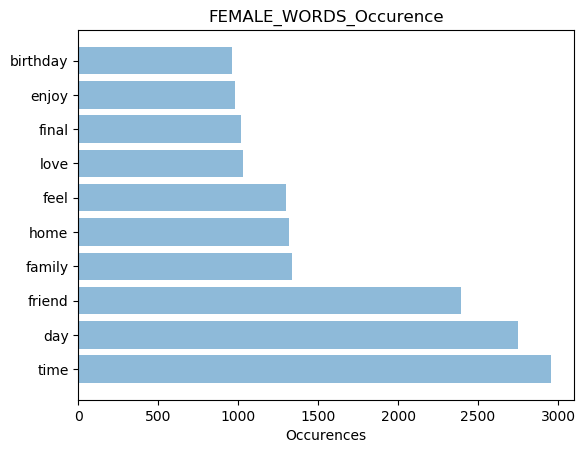

In [281]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = a
y_pos = np.arange(len(a))
performance = b
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Occurences')
plt.title('FEMALE_WORDS_Occurence')
 
plt.show()

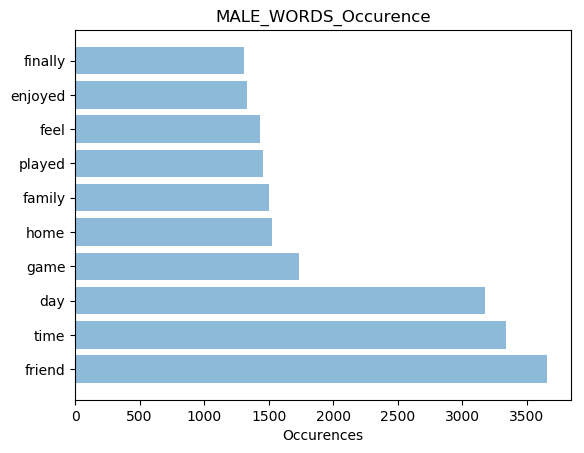

In [282]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = c
y_pos = np.arange(len(c))
performance = d
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Occurences')
plt.title('MALE_WORDS_Occurence')
 
plt.show()

In [70]:
for i,k in dict(result.groupby('gender').size()).items():
    print(i,k)

f 42069
m 57690
o 697


In [84]:
male_numbers = 57690
dict_male  = {}
for i in result[result['gender'] == 'm']['predicted_category']:
    if i in dict_male:
        dict_male[i]+=1
    else:
        dict_male[i] = 1
for i,k in dict_male.items():
    dict_male[i] = k/male_numbers

In [85]:
female_numbers = 42069
dict_female = {}
for i in result[result['gender'] == 'f']['predicted_category']:
    if i in dict_female:
        dict_female[i]+=1
    else:
        dict_female[i] = 1
for i,k in dict_female.items():
    dict_female[i] = k/female_numbers

In [86]:
print(dict_male,dict_female,sep='\n\n\n')

{'affection': 0.2903102790778298, 'leisure': 0.08363667880048535, 'achievement': 0.3670826833073323, 'enjoy_the_moment': 0.11646732535968106, 'bonding': 0.11189114231235917, 'nature': 0.016328653146125846, 'exercise': 0.014283237996186514}


{'exercise': 0.008723763341177589, 'bonding': 0.09921795146069552, 'affection': 0.40868573058546676, 'enjoy_the_moment': 0.10275975183626898, 'achievement': 0.29820057524543014, 'nature': 0.021131949891844352, 'leisure': 0.06128027763911669}


In [98]:
import collections
print(list(dict(collections.OrderedDict(sorted(dict_male.items()))).values()),list(dict(collections.OrderedDict(sorted(dict_female.items()))).values()),list(dict(collections.OrderedDict(sorted(dict_female.items()))).keys()),sep='\n\n')

[0.3670826833073323, 0.2903102790778298, 0.11189114231235917, 0.11646732535968106, 0.014283237996186514, 0.08363667880048535, 0.016328653146125846]

[0.29820057524543014, 0.40868573058546676, 0.09921795146069552, 0.10275975183626898, 0.008723763341177589, 0.06128027763911669, 0.021131949891844352]

['achievement', 'affection', 'bonding', 'enjoy_the_moment', 'exercise', 'leisure', 'nature']


In [145]:
x = list(dict(collections.OrderedDict(sorted(dict_male.items()))).values())
y = list(dict(collections.OrderedDict(sorted(dict_female.items()))).values())
k = ['achieve', 'affection', 'bonding', 'enjoy', 'exercise', 'leisure', 'nature']

In [149]:
l = 0
for i in x:
    if i == max(x):
        print(k[l])

achieve


In [150]:
l = 0
for i in y:
    if i == max(y):
        print(k[l])
    l+=1

affection


([<matplotlib.axis.XTick at 0x11859aac8>,
 <a list of 7 Text xticklabel objects>)

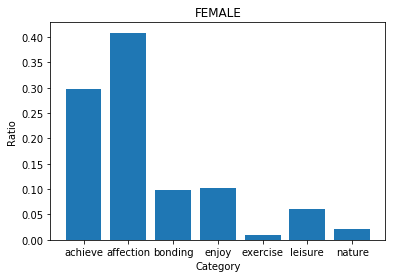

In [143]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.title('FEMALE')
z = np.arange(7)
plt.xlabel('Category')
plt.ylabel('Ratio')
plt.bar(z, height= y) 
plt.xticks(z,k)

([<matplotlib.axis.XTick at 0x11823f2e8>,
 <a list of 7 Text xticklabel objects>)

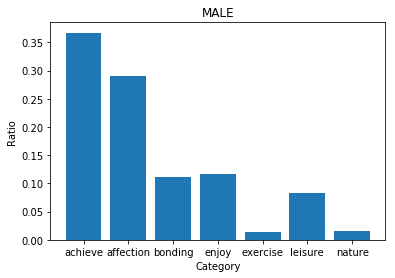

In [142]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.title('MALE')
z = np.arange(7)
plt.xlabel('Category')
plt.ylabel('Ratio')
plt.bar(z, height= x) 
plt.xticks(z,k)



In [41]:
result.head()

,hmid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,age,country,gender,marital,parenthood
wid,,,,,,,,,,,,,
2053,27673,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,35,USA,m,single,n
2,27674,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,29.0,IND,m,married,y
1936,27675,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise,30,USA,f,married,y
206,27676,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding,28,DNK,f,married,n
6227,27677,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection,55,USA,f,divorced,y


In [ ]:
sentence_list = []
for i in Cleaned_hm['cleaned_hm']:
    sentence_list.append(i)

In [51]:
text=''
for x in sentence_list:
    text+=x


In [54]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
k = ''
for i in result2['text']:
    k+=str(i)
male_words_repetition = k.split()
male_words = set(k.split())
z = ''
for i in male_words:
    z +=str(i)


wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(z)#<-must be the string


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [33]:
Workers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10844 entries, 0 to 10843
Data columns (total 6 columns):
wid           10844 non-null int64
age           10809 non-null object
country       10771 non-null object
gender        10812 non-null object
marital       10787 non-null object
parenthood    10813 non-null object
dtypes: int64(1), object(5)
memory usage: 508.4+ KB


In [24]:
Workers['country'].unique()

array(['USA', 'IND', 'VNM', 'THA', 'GBR', 'SRB', 'BGR', 'BRA', 'BGD',
       'CAN', 'PRT', 'PHL', 'VEN', 'MKD', 'DOM', 'DNK', 'IDN', 'AUS',
       'URY', 'JAM', 'EGY', 'DEU', 'KEN', 'MDA', 'IRL', 'NGA', 'ALB',
       'MEX', 'TTO', 'KWT', 'RUS', 'LTU', 'PRI', 'SWE', 'PER', 'PAK',
       'TUR', 'FRA', 'ARE', 'COL', 'GRC', 'ROU', 'ARM', 'MAC', 'SGP',
       'UGA', 'POL', 'NIC', 'JPN', 'ESP', 'TWN', 'FIN', 'ITA', 'GHA',
       'AUT', 'NPL', 'NZL', 'NLD', 'KOR', 'LKA', 'KNA', 'ZAF', 'BEL',
       'ISL', 'DZA', 'AFG', 'GMB', nan, 'ASM', 'MYS', 'CZE', 'MLT', 'SVN',
       'UMI', 'ARG', 'SAU', 'EST', 'ECU', 'ZMB', 'CHL', 'MAR', 'ISR',
       'LVA', 'KAZ', 'NOR', 'CRI', 'BRB', 'HRV', 'ETH', 'TCA', 'BHS',
       'VIR', 'GTM', 'IRQ', 'HKG', 'MUS', 'TUN', 'SUR', 'SLV', 'CYP',
       'UKR'], dtype=object)